In [1]:
import networkx as nx
import itertools
import random
import numpy as np
import matplotlib.pyplot as plt

# 1-generation by the model

1- select a couple of nodes (i,j)

2- generate a random number, rand , between 0 and 1

3- if rand<p : create the edge (i,j)
    
    
Repeat for all the  possible couples of nodes

In [2]:
#parameters
N=1000
p=0.05

In [3]:
G=nx.Graph()

In [4]:
#add the nodes
nodes=[i for i in range(N)]
G.add_nodes_from(nodes)

In [5]:
# network creation
edges=list(itertools.combinations(nodes,2))

In [6]:
#generate edges
for (u,v) in edges:
    rand=random.uniform(0,1)
    if rand<p:
        G.add_edge(u,v)

In [7]:
G.number_of_edges()

24762

# 2- generation with Netwrokx

In [8]:
#parameters
N=1000
p=0.05

G=nx.erdos_renyi_graph(N,p)

# 3-ER graphs properties

In [9]:
#parameters
NList=[500,1000,1500,3000,5000]
p=0.005

GList=[]
for N in NList:
    G=nx.erdos_renyi_graph(N,p)
    GList.append(G)

In [10]:
# number of edges

In [11]:
for (G,N) in zip(GList,NList):
    number_of_edges=G.number_of_edges()
    print('number_of edges_observed:', number_of_edges)
    print('number_of edges_expected:',p*N*(N-1)/2)
    print('')

number_of edges_observed: 625
number_of edges_expected: 623.75

number_of edges_observed: 2513
number_of edges_expected: 2497.5

number_of edges_observed: 5653
number_of edges_expected: 5621.25

number_of edges_observed: 22660
number_of edges_expected: 22492.5

number_of edges_observed: 62485
number_of edges_expected: 62487.5



In [12]:
#averaege degree

In [13]:
avK=[]
for (G,N) in zip(GList,NList):
    average_degree=np.mean(list(dict(nx.degree(G)).values()))
    print('average_degree_observed:', average_degree)
    print('average_degree_expected:',p*(N-1))
    print('')
    avK.append(average_degree)



average_degree_observed: 2.5
average_degree_expected: 2.495

average_degree_observed: 5.026
average_degree_expected: 4.995

average_degree_observed: 7.537333333333334
average_degree_expected: 7.495

average_degree_observed: 15.106666666666667
average_degree_expected: 14.995000000000001

average_degree_observed: 24.994
average_degree_expected: 24.995



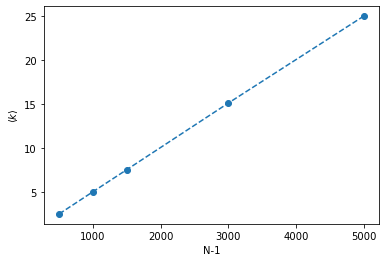

0.005000842105263158
0.035948210526314715


In [14]:
plt.plot(np.array(NList)-1,avK,'o--')
plt.xlabel('N-1')
plt.ylabel(r'$\langle k\rangle$')
plt.show()

# <k>=p*(N-1) // y=mx+b
m,b = np.polyfit(np.array(NList)-1, avK, 1)
print(m)
print(b)

In [15]:
# density

In [16]:
for (G,N) in zip(GList,NList):
    density=nx.density(G)
    print('density_observed:', density)
    print('density_expected:',p)
    print('')
    


density_observed: 0.00501002004008016
density_expected: 0.005

density_observed: 0.005031031031031031
density_expected: 0.005

density_observed: 0.005028241049588615
density_expected: 0.005

density_observed: 0.005037234633766811
density_expected: 0.005

density_observed: 0.004999799959991998
density_expected: 0.005



In [17]:
#another parameter setup
N=1000
pList=[0.0001,0.0005,0.001,0.002,0.003,0.005,0.01,0.03,0.05,0.07,0.1]

GList=[]
for p in pList:
    G=nx.erdos_renyi_graph(N,p)
    GList.append(G)

In [18]:
# size of the giant component
GCsize=[]
for G in GList:
    Comp=nx.connected_components(G)
    GCsize.append(max([len(c) for c in Comp])/N)

(0.0, 0.01)

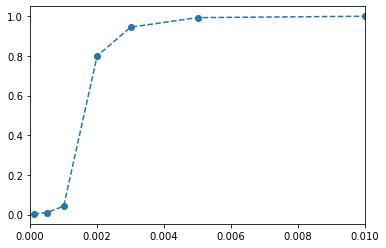

In [19]:
plt.plot(pList,GCsize,'o--')
plt.xlim(0,0.01)

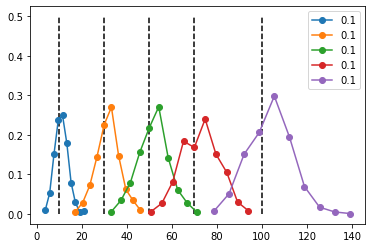

In [20]:
# degree distribution
degrees=[]
for G in GList:
    degrees.append(list(dict(G.degree()).values()))

for klist in degrees[-5:]:
    y,x=np.histogram(klist, bins=10)
    ynorm=y/sum(y)
    plt.plot(x[1:],ynorm,'o-',label=p)
for p in pList[-5:]:
    plt.vlines(x=N*p,ymin=0,ymax=0.5,linestyle='--')
plt.legend()
plt.show()

In [21]:
#parameter setup

#we fix the average degree
avK=5
#This is the input list of the N values
NList=[100,300,500,800,900,1000]
pList=[avK/i for i in NList]

GList=[]
for (p,N) in zip(pList,NList):
    G=nx.erdos_renyi_graph(N,p)
    GList.append(G)

In [22]:
#clustering
clust=[]
for G in GList:
    clust.append(nx.average_clustering(G))

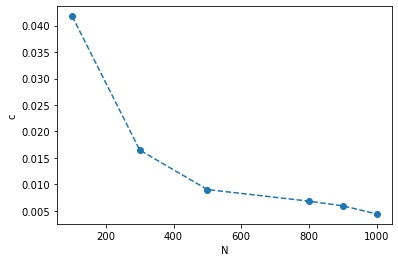

In [23]:
plt.plot(NList,clust,'o--')
plt.xlabel('N')
plt.ylabel('c')
plt.show()

In [24]:
#average shortest path
avsp=[]
for G in GList:
    Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
    G0 = G.subgraph(Gcc[0])
    avsp.append(nx.average_shortest_path_length(G0))

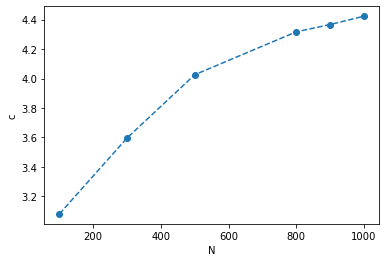

In [25]:
plt.plot(NList,avsp,'o--')
plt.xlabel('N')
plt.ylabel('c')
plt.show()